# Logistic Regression

&nbsp;&nbsp;&nbsp;&nbsp;Logistic regression is a popular machine learning algorithm used for binary classification tasks. Unlike linear regression, which is suitable for continuous target variables, logistic regression predicts the probability of an instance belonging to a specific class. This note provides an overview of logistic regression, its advantages, limitations, key concepts, and evaluation metrics.

### Understanding Binary Classification
Binary classification involves predicting one of two possible outcomes: "yes" or "no," "true" or "false," or simply 0 and 1. Logistic regression is specifically designed for such problems, where the dependent variable is categorical.

### Logistic Regression Intuition
Logistic regression builds upon the concept of linear regression but introduces a nonlinear transformation to restrict the output to a range between 0 and 1. This is achieved using the logistic function, also known as the sigmoid function. The sigmoid function maps any real-valued number to a value between 0 and 1.

The equation for logistic regression can be represented as:

In [240]:
import pandas as pd
import seaborn as sns
import numpy as np

In [241]:
data = pd.read_csv("loan-train.csv")

In [242]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [243]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [244]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<Axes: xlabel='Gender', ylabel='count'>

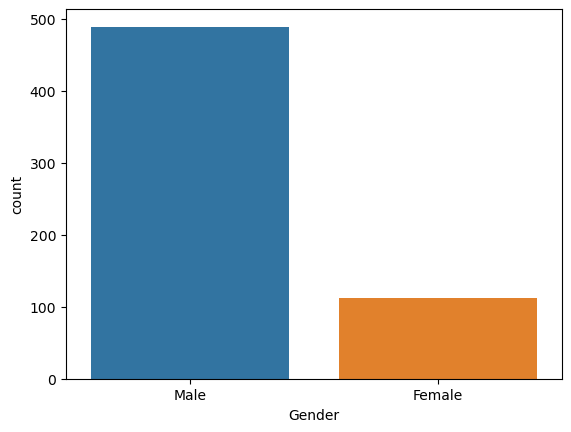

In [245]:
sns.countplot(x=data.Gender)

<Axes: xlabel='Dependents', ylabel='count'>

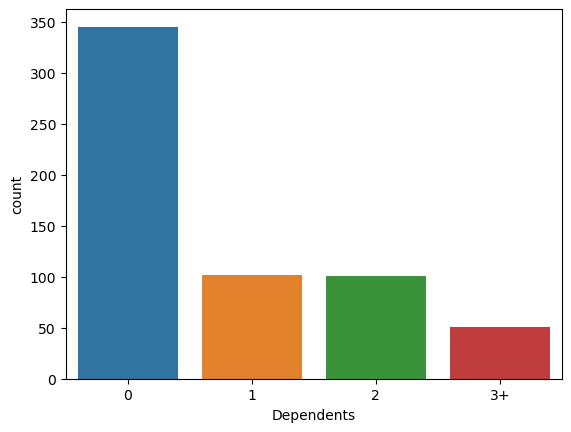

In [246]:
sns.countplot(x =data["Dependents"])

<Axes: xlabel='Married', ylabel='count'>

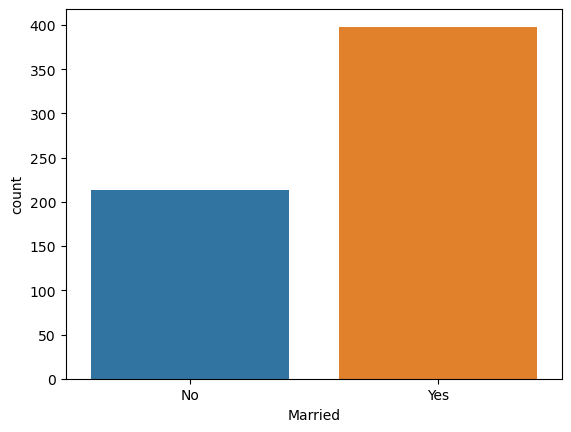

In [247]:
sns.countplot(x =data["Married"])

<Axes: xlabel='Self_Employed', ylabel='count'>

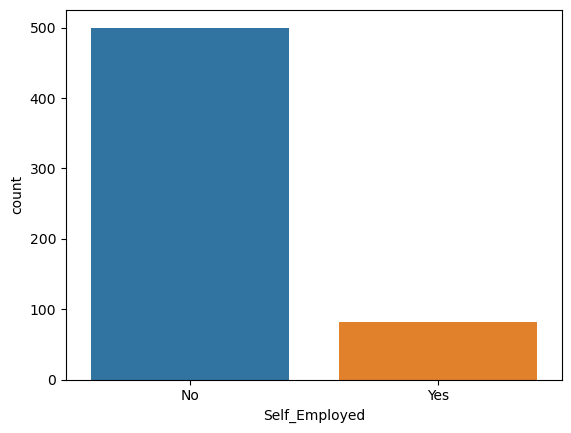

In [248]:
sns.countplot(x =data["Self_Employed"])

In [249]:
data["Gender"] = data["Gender"].fillna(data["Gender"].mode()[0])
data["Married"] = data["Married"].fillna(data["Married"].mode()[0])
data["Dependents"] = data["Dependents"].fillna(data["Dependents"].mode()[0])
data["Self_Employed"] = data["Self_Employed"].fillna(data["Self_Employed"].mode()[0])

In [250]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [251]:
data["LoanAmount"] =data["LoanAmount"].fillna(data["LoanAmount"].mean())
data["Loan_Amount_Term"] =data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].mean())
data["Credit_History"] =data["Credit_History"].fillna(data["Credit_History"].mean())


<Axes: xlabel='LoanAmount'>

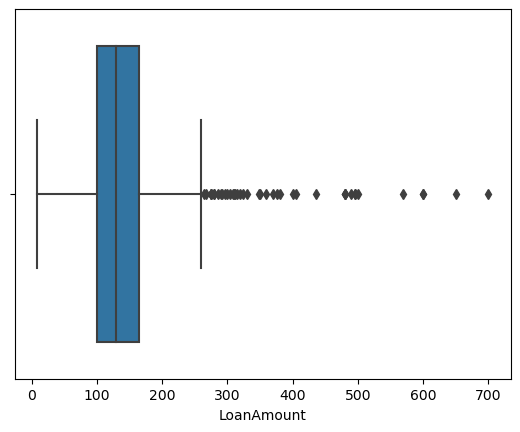

In [252]:
sns.boxplot(x = data["LoanAmount"])

<Axes: xlabel='Loan_Amount_Term'>

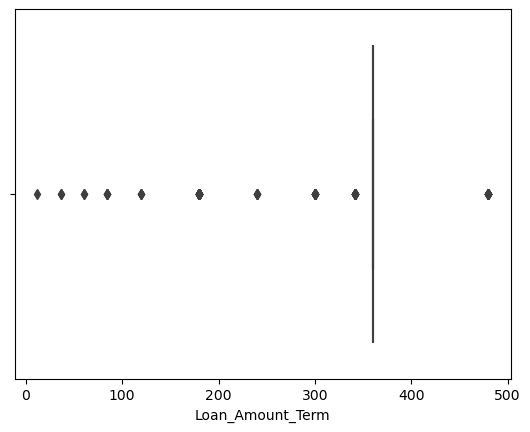

In [253]:
sns.boxplot(x = data["Loan_Amount_Term"])

In [254]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [255]:
data['Loan_Status'].unique().tolist()

['Y', 'N']

In [256]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [257]:
encoder = LabelEncoder()

data['Gender'] = encoder.fit_transform(data['Gender'])

In [258]:
order_mapping = [['No', 'Yes']] 
encoder = OrdinalEncoder(categories=order_mapping)
encoded_data = encoder.fit_transform(data[['Married']])
data['Married'] = encoded_data

In [259]:
order_map = [['0', '1', '2', '3+']]
encoder = OrdinalEncoder(categories=order_map)
encoded_data = encoder.fit_transform(data[['Dependents']])
data['Dependents'] = encoded_data

In [260]:
order_map = [['Not Graduate','Graduate']]
encoder = OrdinalEncoder(categories=order_map)
encoded_data = encoder.fit_transform(data[['Education']])
data['Education'] = encoded_data

In [261]:
order_map = [['Rural', 'Semiurban', 'Urban']]
encoder = OrdinalEncoder(categories=order_map)
encoded_data = encoder.fit_transform(data[['Property_Area']])
data['Property_Area'] = encoded_data

In [262]:
order_map = [['Y', 'N'][::-1]]
encoder = OrdinalEncoder(categories=order_map)
encoded_data = encoder.fit_transform(data[['Loan_Status']])
data['Loan_Status'] = encoded_data

In [263]:

order_map = [['No', 'Yes']]
encoder = OrdinalEncoder(categories=order_map)
encoded_data = encoder.fit_transform(data[['Self_Employed']])
data['Self_Employed'] = encoded_data

In [264]:
data["Self_Employed"].unique()

array([0., 1.])

In [265]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    float64
 3   Dependents         614 non-null    float64
 4   Education          614 non-null    float64
 5   Self_Employed      614 non-null    float64
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    float64
 12  Loan_Status        614 non-null    float64
dtypes: float64(10), int64(2), object(1)
memory usage: 62.5+ KB


In [266]:
del data['Loan_ID']

<Axes: >

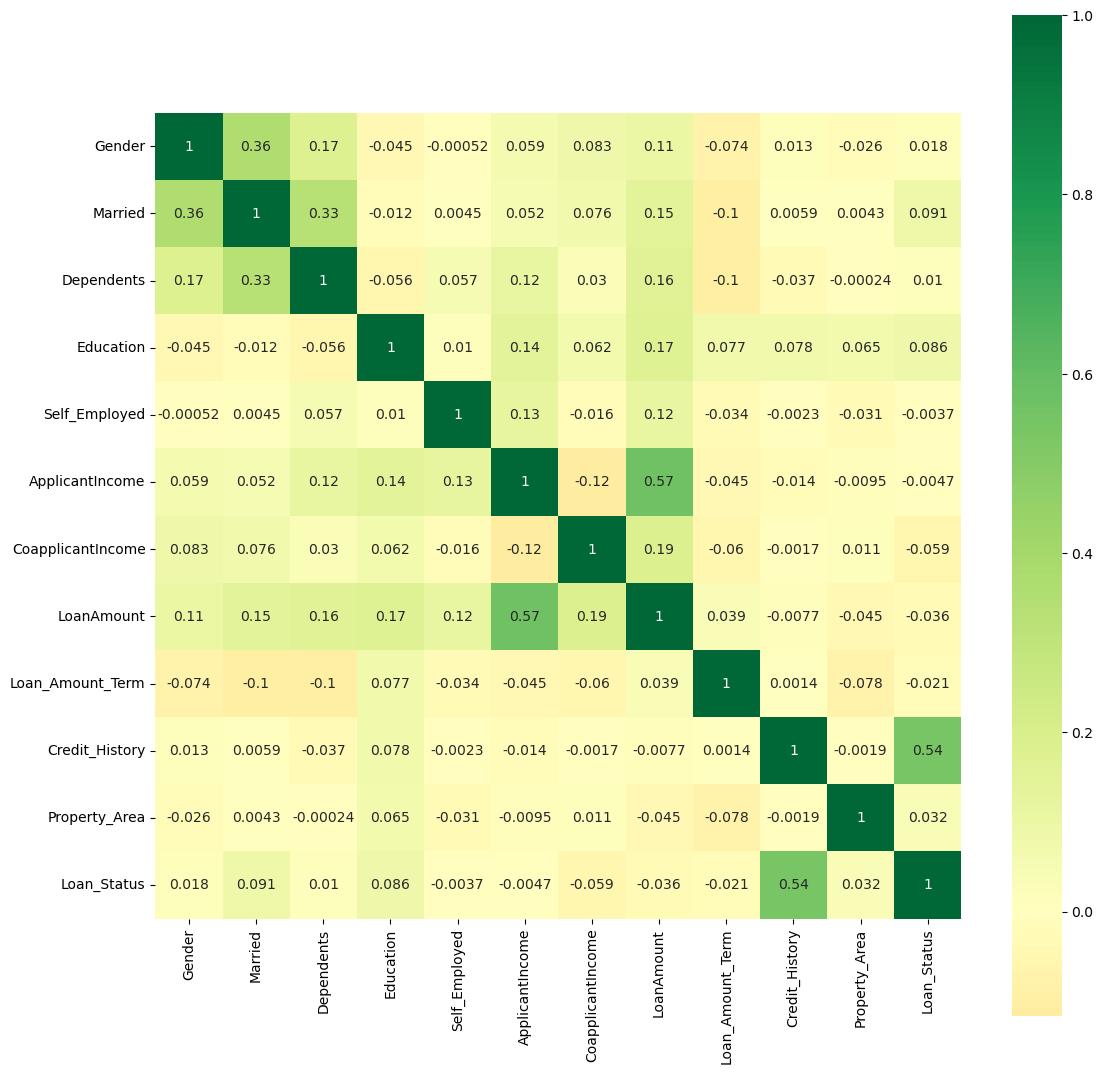

In [267]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13, 13))
# Plot the correlation matrix as a heatmap
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', center=0, square=True)


In [268]:
X = data.drop("Loan_Status", axis=1)
y = data['Loan_Status']

In [269]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [270]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    float64
 4   Self_Employed      614 non-null    float64
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 52.9 KB


In [271]:
from sklearn.linear_model import LogisticRegression
# Creating an instance of the Logistic Regression model
model = LogisticRegression()

# Training the model on the training data
model.fit(X_train, y_train)

LogisticRegression()

In [272]:
# Making predictions on the test data
y_pred = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [273]:
from sklearn.metrics import accuracy_score
# Evaluating the model's accuracy
accuracy = accuracy_score(y_train, y_pred)
print("Train Accuracy:", accuracy)

Train Accuracy: 0.8167006109979633


In [274]:
from sklearn.metrics import accuracy_score
# Evaluating the model's accuracy
accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.7886178861788617


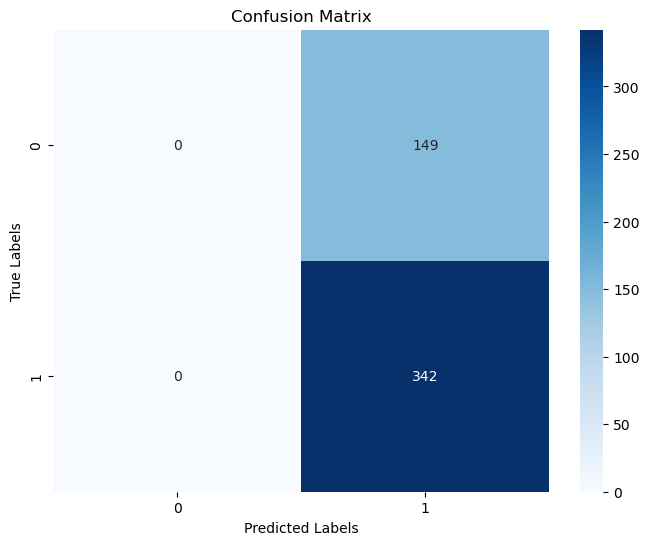

In [275]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

plt.show()

In [276]:
y_pred

array([1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1.

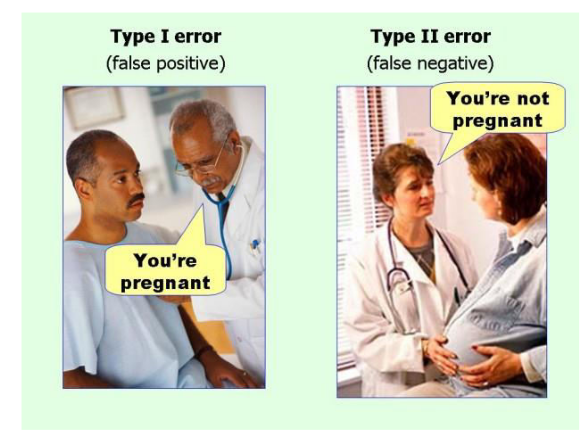

## Conclusion
Logistic regression is a valuable tool for binary classification tasks. It provides a straightforward approach to predicting probabilities and making decisions based on those probabilities. By understanding the intuition behind logistic regression, implementing it using scikit-learn, and evaluating its performance, you can leverage this algorithm for a wide range of binary classification problems.

Remember that logistic regression is just one piece of the machine learning puzzle. As you explore more advanced techniques, you'll discover additional algorithms and concepts that can further enhance your predictive modeling capabilities.

# Hyperparameter Tuning: *Optimizing Model Performance*

### Introduction
Hyperparameter tuning is the process of finding the optimal configuration of hyperparameters for a machine learning model. Hyperparameters are parameters set before the learning process begins and are not learned from the data. Tuning these hyperparameters can significantly impact the performance of the model. This short note provides an overview of hyperparameter tuning and demonstrates how to perform it using logistic regression and linear regression as examples.

### Understanding Hyperparameters
Hyperparameters are settings or configurations that control the learning process of a machine learning algorithm. Unlike model parameters, which are learned during training, hyperparameters need to be specified before training the model. Examples of hyperparameters include learning rate, regularization strength, number of hidden layers in a neural network, and kernel type in support vector machines.

### The Importance of Hyperparameter Tuning
Hyperparameter tuning is crucial for optimizing model performance. Choosing the right combination of hyperparameters can help improve the model's accuracy, robustness, and generalization ability. A poorly chosen set of hyperparameters may lead to overfitting or underfitting, resulting in suboptimal performance.

### Methods for Hyperparameter Tuning
There are various methods for hyperparameter tuning, including:

1. Manual Search: Manually trying different hyperparameter values and evaluating the model's performance. This approach can be time-consuming and may not guarantee finding the best hyperparameters.

2. Grid Search: Defining a grid of hyperparameter values and exhaustively searching through all possible combinations. Grid search evaluates and compares models trained on each combination to identify the best hyperparameters.

3. Random Search: Randomly sampling hyperparameter values within a predefined search space. Random search explores a wider range of hyperparameters and can be more efficient than grid search in some cases.

4. Bayesian Optimization: Using probabilistic models to build a surrogate function of the hyperparameter space and iteratively selecting new hyperparameters based on previous observations. Bayesian optimization can be more efficient than grid search and random search for complex and high-dimensional search spaces.

In [277]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0.0,0.0,1.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1,1.0,1.0,1.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,1,1.0,0.0,1.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,1,1.0,0.0,0.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,1,0.0,0.0,1.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0


In [278]:
from sklearn.model_selection import GridSearchCV

In [279]:
# Defining the hyperparameters to tune and their potential values
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Performing grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Getting the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

/home/mr-robot/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/mr-robot/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/mr-robot/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/mr-robot/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/mr-robot/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/mr-robot/anaconda3/lib/python3.10/site-packages/s

In [280]:
# Evaluating the best model on the test data
accuracy = best_model.score(X_train, y_train)
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)

Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.8167006109979633


In [281]:

# Evaluating the best model on the test data
accuracy = best_model.score(X_test, y_test)
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)

Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.7886178861788617


# Normalization and Standardization

#### Introduction
Normalization and standardization are common preprocessing techniques used in machine learning to transform numerical data before feeding it into a model. These techniques help to scale the features and make them suitable for the learning algorithm. This short note provides an overview of normalization and standardization, their differences, and when to use each technique.

### Normalization
Normalization, also known as feature scaling, is the process of scaling the features to a specific range, typically between 0 and 1. It ensures that all features have the same scale, preventing one feature from dominating the others. Common normalization techniques include:

1. Min-Max Scaling: This technique linearly scales the features to a specified range using the minimum and maximum values of each feature. The formula for min-max scaling is:

$$ X\_normalized = \frac{X - X_{min}}{X_{max} - X_{min}} $$

2. Z-Score Normalization: Also known as standard score normalization, it scales the features to have a mean of 0 and a standard deviation of 1. This technique is suitable when the data follows a normal distribution. The formula for z-score normalization is:

$$ X\_normalized = \frac{X - X_{mean}}{X_{std} }$$

Normalization is useful when the absolute values or ranges of the features are not important, and the focus is on the relative relationships between the features.

### Standardization

Standardization, also called *z-score* normalization, transforms the features to have a mean of 0 and a standard deviation of 1. Unlike normalization, standardization does not bound the features to a specific range. It is particularly useful when the data does not follow a normal distribution and when preserving the original scale of the features is important.

Standardization can be performed using the z-score normalization formula mentioned earlier.

##### Differences between Normalization and Standardization
- Normalization scales the features to a specific range, typically between 0 and 1, while standardization transforms the features to have a mean of 0 and a standard deviation of 1.
- Normalization is sensitive to outliers, while standardization is more robust as it is based on the distribution of the data.
- Normalization is suitable when the absolute values or ranges of the features are not important, while standardization preserves the original scale of the features.

##### When to Use Normalization or Standardization
- Use normalization when the range of the features is important, and the absolute values are meaningful. Examples include image processing, where pixel values range from 0 to 255.
- Use standardization when the distribution of the features is important, and the relative relationships between the features matter. It is commonly used in statistical modeling and algorithms that rely on measures of variability.

In [282]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalization (Min-Max Scaling)
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(X_train)
normalized_df = pd.DataFrame(normalized_data, columns=X_train.columns)


# Standardization (Z-Score Normalization)
scaler = StandardScaler()
standardized_data = scaler.fit_transform(X_train)
standardized_df = pd.DataFrame(standardized_data, columns=X_train.columns)
standardized_df.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.483393,0.757442,-0.723275,0.534173,-0.397516,0.083915,0.180667,1.349992,0.294492,-0.006857,-0.046951
1,0.483393,0.757442,-0.723275,0.534173,-0.397516,-0.429338,0.385430,-0.204748,0.294492,0.447846,-0.046951
2,0.483393,0.757442,1.260681,0.534173,-0.397516,0.126095,0.005831,0.711852,0.294492,0.447846,-0.046951
3,0.483393,0.757442,-0.723275,0.534173,-0.397516,-0.576970,0.464185,-0.239556,0.294492,0.447846,-0.046951
4,0.483393,-1.320234,-0.723275,0.534173,-0.397516,-0.225522,-0.528127,-0.587632,0.294492,-2.433641,-0.046951


In [283]:
normalized_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,1.0,0.000000,1.0,0.0,0.072356,0.054000,0.363104,0.74359,0.842199,0.5
1,1.0,1.0,0.000000,1.0,0.0,0.034731,0.069599,0.166911,0.74359,1.000000,0.5
2,1.0,1.0,0.666667,1.0,0.0,0.075448,0.040680,0.282577,0.74359,1.000000,0.5
3,1.0,1.0,0.000000,1.0,0.0,0.023908,0.075599,0.162518,0.74359,1.000000,0.5
4,1.0,0.0,0.000000,1.0,0.0,0.049672,0.000000,0.118594,0.74359,0.000000,0.5


In [284]:
# Making predictions on the test data
y_pred = model.predict(normalized_df)
y_pred_test = model.predict(normalized_df)

In [285]:
from sklearn.metrics import accuracy_score
# Evaluating the model's accuracy
accuracy = accuracy_score(y_train, y_pred)
print("Train Accuracy:", accuracy)

Train Accuracy: 0.6965376782077393


In [286]:
from sklearn.metrics import confusion_matrix

# Assuming 'y_true' contains the true labels and 'y_pred' contains the predicted labels
cm = confusion_matrix(y_train, y_pred)
print(cm)

[[  0 149]
 [  0 342]]


## Conclusion
Normalization and standardization are preprocessing techniques that transform numerical features to make them suitable for machine learning algorithms. Normalization scales the features to a specific range, while standardization transforms them to have a mean of 0 and a standard deviation of 1. The choice between normalization and standardization depends on the nature of the data and the requirements of the learning algorithm